# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [11]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [12]:
# Your work here.
df.describe()


,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


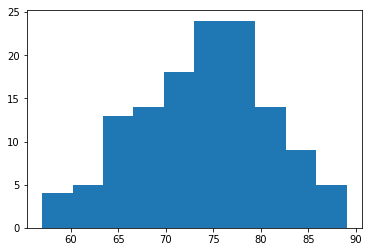

In [16]:
from matplotlib import pyplot

#df['temperature'] = df['temperature']*10
df.temperature = df.temperature.astype('int')
df.heart_rate = df.heart_rate.astype('int')

pyplot.hist(df.heart_rate)
pyplot.show()

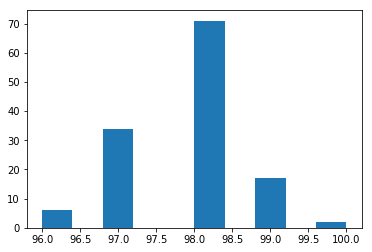

In [17]:
pyplot.hist(df.temperature)
pyplot.show()

In [21]:
import scipy.stats as stats

sample1 = df.sample(50)
sample2 = df.sample(50)
print(df.mean())
print(sample1.mean())
print(sample2.mean())

temperature    97.807692
heart_rate     73.761538
dtype: float64
temperature    97.74
heart_rate     72.72
dtype: float64
temperature    97.88
heart_rate     75.48
dtype: float64


In [22]:
samplet1 = df.sample(100)
samplet2 = df.sample(5)
samplet3 = df.sample(5)

print(samplet1.mean())
print(samplet2.mean())
print(samplet3.mean())


samplet2.append(samplet3)
print(sample2.mean())

temperature    97.81
heart_rate     73.61
dtype: float64
temperature    97.6
heart_rate     72.2
dtype: float64
temperature    97.8
heart_rate     76.8
dtype: float64
temperature    97.88
heart_rate     75.48
dtype: float64


In [27]:
df_male = df[df['gender']=='M']
df_male.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,97.692308,73.369231
std,0.748396,5.875184
min,96.000000,58.000000
25%,97.000000,70.000000
50%,98.000000,73.000000
75%,98.000000,78.000000
max,99.000000,86.000000


In [28]:
df_male = df[df['gender']=='F']
df_male.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,97.923077,74.153846
std,0.796628,8.105227
min,96.000000,57.000000
25%,98.000000,68.000000
50%,98.000000,76.000000
75%,98.000000,80.000000
max,100.000000,89.000000
